In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [13]:
file = "C:/Users/saira/Documents/DIPLOMADO/MODULO IV/PROYECTO/DataSets/Heart.csv"

In [17]:
all_variables = ['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] #ojo en el tarjet
features = ['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['target']

df = pd.read_csv(file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df.drop([164], axis=0, inplace=True)

In [19]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [20]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921


In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.46933484e-01, 1.50672524e-01, 8.49522692e-02, 1.61968964e-02,
       3.85721017e-04, 2.80717650e-04, 2.18383288e-04, 1.00270817e-04,
       7.74906534e-05, 5.90506856e-05, 5.05588512e-05, 4.11936290e-05,
       3.14394011e-05])

In [22]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12''PC13','PC14','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12PC13,PC14,target
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497,1.0
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417,1.0
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260,1.0
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533,1.0
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921,1.0


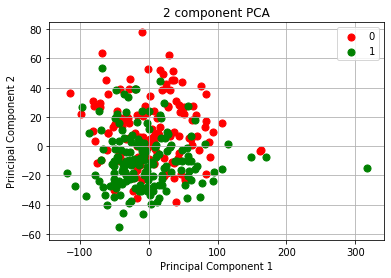

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0, 1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()